In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('bmh')

# Weibull AFT

In [3]:
df = pd.read_csv('./data/veteran.csv')

In [4]:
df.head()

,Unnamed: 0,trt,celltype,time,status,karno,diagtime,age,prior
0,1,1,squamous,72,1,60,7,69,0
1,2,1,squamous,411,1,70,5,64,10
2,3,1,squamous,228,1,60,3,38,0
3,4,1,squamous,126,1,60,9,63,10
4,5,1,squamous,118,1,70,11,65,10


`celltype`: categorical covariate -> must converted to the num.vals using one-hot-encoding technique

In [8]:
df1 = df[df['trt']==1].drop(['trt', 'Unnamed: 0'], axis=1)
df1 = pd.get_dummies(df1, columns=['celltype'])

In [9]:
df1.head()

,time,status,karno,diagtime,age,prior,celltype_adeno,celltype_large,celltype_smallcell,celltype_squamous
0,72,1,60,7,69,0,False,False,False,True
1,411,1,70,5,64,10,False,False,False,True
2,228,1,60,3,38,0,False,False,False,True
3,126,1,60,9,63,10,False,False,False,True
4,118,1,70,11,65,10,False,False,False,True


In [11]:
from lifelines import WeibullAFTFitter
waft = WeibullAFTFitter(fit_intercept=False).fit(df1, duration_col='time', event_col='status')

In [13]:
waft.print_summary()

<lifelines.WeibullAFTFitter: fitted with 69 total observations, 5 right-censored observations>
             duration col = 'time'
                event col = 'status'
   number of observations = 69
number of events observed = 64
           log-likelihood = -362.85
         time fit was run = 2024-06-29 02:51:59 UTC

---
                             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                  
lambda_ age                  0.00       1.00       0.01            -0.02             0.03                 0.98                 1.03
        celltype_adeno       2.41      11.16       0.99             0.47             4.36                 1.60                77.88
        celltype_large       3.64      38.01       0.96             1.76             5.52                 5.81               248.81
        celltype_smallcell   3.17      23.70       0.94             1.32             5.01                 3.76               149.29
        celltype_squamous    3.57      35.51       0.94             1.73             5.41                 5.65               223.15
        diagtime            -0.00       1.00       0.02            -0.04             0.04                 0.96                 1.04
        karno                0.02       1.03       0.01             0.01             0.04                 1.01                 1.04
        prior               -0.04       0.96       0.03            -0.10             0.02                 0.91                 1.02
rho_    Intercept            0.08       1.08       0.09            -0.11             0.27                 0.90                 1.30

                             cmp to     z      p   -log2(p)
param   covariate                                          
lambda_ age                    0.00  0.19   0.85       0.24
        celltype_adeno         0.00  2.43   0.01       6.06
        celltype_large         0.00  3.80 <0.005      12.73
        celltype_smallcell     0.00  3.37 <0.005      10.38
        celltype_squamous      0.00  3.81 <0.005      12.79
        diagtime               0.00 -0.03   0.98       0.03
        karno                  0.00  3.05 <0.005       8.77
        prior                  0.00 -1.40   0.16       2.64
rho_    Intercept              0.00  0.85   0.40       1.33
---
Concordance = 0.69
AIC = 743.69
log-likelihood ratio test = 19.43 on 7 df
-log2(p) of ll-ratio test = 7.17

This table shows the output of a Weibull Accelerated Failure Time (AFT) model fitted using the lifelines library in Python. I'll explain the key components point by point:

1. Model Specification:
   The model is a Weibull AFT model with the following setup:
   - Duration column: 'time'
   - Event column: 'status'
   - Number of observations: 69
   - Number of events observed: 64

2. Model Parameters:
   The Weibull distribution has two parameters:
   λ (lambda): Scale parameter
   ρ (rho): Shape parameter

   The model equation can be written as:
   log(T) = Xβ + σW

   Where:
   T: Time to event
   X: Covariate matrix
   β: Coefficient vector
   σ: Scale parameter (1/ρ)
   W: Error term following a standard Gumbel distribution

3. Coefficients:
   The table shows coefficients for various predictors:
   - age
   - celltype (adeno, large, smallcell, squamous)
   - diagtime
   - karno
   - prior

   For each coefficient:
   - 'coef' is the estimated coefficient (β)
   - 'exp(coef)' is exp(β), which represents the time ratio
   - 'se(coef)' is the standard error of the coefficient
   - '95% CI' is provided for both coef and exp(coef)

4. Statistical Significance:
   - 'z' is the z-score (coef / se(coef))
   - 'p' is the p-value
   - '-log2(p)' is a transformed p-value for easier interpretation

5. Model Fit Statistics:
   - Concordance: 0.69 (measure of predictive accuracy)
   - AIC: 743.69 (Akaike Information Criterion, lower is better)
   - Log-likelihood ratio test: 19.43 on 7 degrees of freedom
   - -log2(p) of ll-ratio test: 7.17

6. Interpretation:
   - Coefficients with low p-values (high -log2(p)) are statistically significant
   - exp(coef) > 1 indicates longer survival times, < 1 indicates shorter times
   - Celltypes (adeno, large, smallcell, squamous) have the largest effects on survival time

This model provides insights into how different factors affect survival time in the context of the study, with cell types being particularly influential predictors.

1. Coefficients (coef):
   - These represent the effect of each variable on the log of survival time.
   - Positive values indicate an increase in survival time, negative values a decrease.
   - For example, celltype_large has a coefficient of 3.64, suggesting it significantly increases survival time compared to the reference category.

2. exp(coef) - Time Ratio:
   - This is the exponentiated coefficient, easier to interpret directly.
   - Values > 1 indicate longer survival times, < 1 indicate shorter times.
   - For celltype_large, exp(coef) = 38.01, meaning this cell type is associated with a 38-fold increase in survival time compared to the reference.

3. se(coef) - Standard Error:
   - Measures the precision of the coefficient estimate.
   - Lower values indicate more precise estimates.

4. 95% Confidence Intervals:
   - Provide a range where we're 95% confident the true parameter value lies.
   - Intervals not crossing 1 for exp(coef) suggest statistically significant effects.

5. z-score:
   - Measures how many standard deviations the estimate is from zero.
   - Larger absolute values indicate stronger evidence against the null hypothesis.

6. p-value:
   - Probability of observing such an extreme result if the null hypothesis were true.
   - Lower values (typically < 0.05) are considered statistically significant.

7. -log2(p):
   - Transforms p-values for easier comparison.
   - Higher values indicate stronger statistical significance.

8. Concordance (0.69):
   - Measures the model's predictive accuracy.
   - 0.5 is random prediction, 1 is perfect prediction.
   - 0.69 suggests moderate predictive power.

9. AIC (743.69):
   - Used for model comparison; lower values indicate better fit.

10. Log-likelihood ratio test (19.43 on 7 df):
    - Tests overall model significance.
    - High value relative to degrees of freedom suggests the model is meaningful.

These scores collectively help assess the model's fit, the significance of individual predictors, and the overall predictive power of the model in explaining survival times.

Catatan:
- low $p-$value indicates it has some contribution to the risk score

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

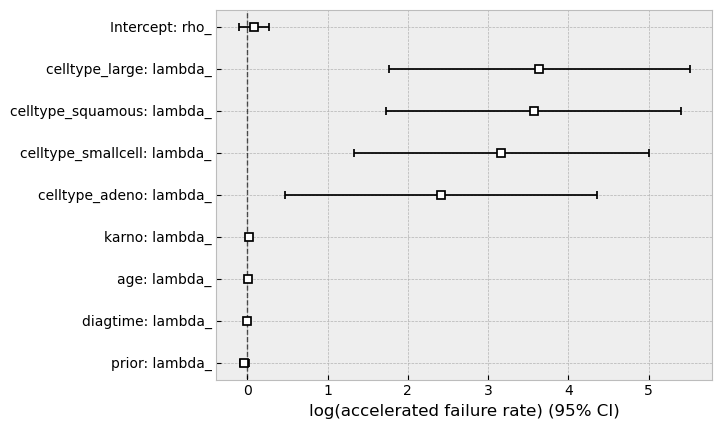

In [14]:
waft.plot()

## Individual survival prob. dist. for $x_i$

In [19]:
estimated_prob_weibull = waft.predict_survival_function(df1, times=df1['time'])
estimated_prob_weibull.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
72.0,0.698056,0.648711,0.678640,0.565821,0.648564,0.329006,0.381687,0.808691,0.603313,0.760653,...,0.407520,0.813526,0.721699,0.774048,0.860058,0.859014,0.821678,0.810565,0.661153,0.568027
411.0,0.093206,0.057446,0.077370,0.023298,0.057360,0.000650,0.001732,0.246166,0.035584,0.164307,...,0.002669,0.256047,0.116129,0.184375,0.369646,0.366692,0.273466,0.249957,0.065122,0.023904
228.0,0.285586,0.221174,0.258837,0.137321,0.220999,0.020738,0.034806,0.476971,0.171744,0.385272,...,0.043734,0.486988,0.320753,0.409448,0.591203,0.588704,0.504214,0.480836,0.236319,0.139197
126.0,0.517305,0.452236,0.491228,0.351962,0.452048,0.130230,0.170998,0.677492,0.395903,0.605531,...,0.192816,0.684938,0.549886,0.625227,0.758483,0.756795,0.697576,0.680374,0.468268,0.354483
118.0,0.541234,0.477539,0.515778,0.378101,0.477354,0.149778,0.193024,0.695833,0.421887,0.626733,...,0.215867,0.702953,0.572916,0.645699,0.773005,0.771402,0.715026,0.698589,0.493287,0.380623


In [20]:
estimated_prob_weibull_T = estimated_prob_weibull.T.reset_index(drop=True)

In [21]:
estimated_prob_weibull_T

,72.0,411.0,228.0,126.0,118.0,10.0,82.0,110.0,314.0,100.0,...,12.0,260.0,200.0,156.0,182.0,143.0,105.0,103.0,250.0,100.0
0,0.698056,0.093206,0.285586,0.517305,0.541234,0.958542,0.661101,0.566125,0.169885,0.598624,...,0.949719,0.235781,0.337107,0.435730,0.374660,0.469543,0.582180,0.588711,0.250388,0.598624
1,0.648711,0.057446,0.221174,0.452236,0.477539,0.950300,0.607591,0.504102,0.118343,0.539144,...,0.939779,0.175603,0.270057,0.367820,0.306676,0.402451,0.521364,0.528413,0.188782,0.539144
2,0.678640,0.077370,0.258837,0.491228,0.515778,0.955363,0.639976,0.541406,0.147823,0.574999,...,0.945882,0.210508,0.309535,0.408231,0.346880,0.442498,0.557983,0.564736,0.224606,0.574999
3,0.565821,0.023298,0.137321,0.351962,0.378101,0.935120,0.519105,0.406018,0.060305,0.443559,...,0.921520,0.101363,0.178589,0.268177,0.211117,0.301886,0.424411,0.431978,0.111491,0.443559
4,0.648564,0.057360,0.220999,0.452048,0.477354,0.950275,0.607433,0.503922,0.118211,0.538970,...,0.939749,0.175443,0.269872,0.367628,0.306487,0.402260,0.521186,0.528237,0.188618,0.538970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.859014,0.366692,0.588704,0.756795,0.771402,0.982258,0.839485,0.786206,0.472635,0.804981,...,0.978425,0.542888,0.631466,0.703832,0.660303,0.726426,0.795557,0.799318,0.556861,0.804981
65,0.821678,0.273466,0.504214,0.697576,0.715026,0.977130,0.797617,0.732810,0.379627,0.755505,...,0.972205,0.454087,0.552043,0.635139,0.584838,0.661613,0.744094,0.748643,0.469249,0.755505
66,0.810565,0.249957,0.480836,0.680374,0.698589,0.975564,0.785210,0.717185,0.354972,0.740961,...,0.970307,0.429901,0.529766,0.615463,0.563488,0.642934,0.729000,0.733767,0.445268,0.740961
67,0.661153,0.065122,0.236319,0.468268,0.493287,0.952429,0.621027,0.519491,0.129967,0.553966,...,0.942345,0.189538,0.286032,0.384330,0.323009,0.418857,0.536486,0.543419,0.203117,0.553966


- Column: Random variable time $t$
- Row: prob. dist. of survival for respective patients

In [29]:
def brier_score(actual, estimated):
    n = len(actual)
    total_error = 0.0
    for i in range(n): # iterate for each subject
        actual_prob = actual['status'].iloc[i]

        # take the computed survival prob. for the given time
        estimated_prob = estimated.iloc[i][actual.iloc[i]['time']]

        if isinstance(estimated_prob, np.float64):
            error = (1.0 - estimated_prob) - actual_prob
        else:
            error = (1.0 - estimated_prob.iloc[0]) - actual_prob
        total_error = total_error + error**2
    
    return total_error/n

In [31]:
brier_score(df1, estimated_prob_weibull_T)

0.35063691339332026

## Plotting baseline vs. original survival func.

- baseline: risk score $\mathbf{\beta}.\mathbf{x} = 0$

In [32]:
def compute_baseline_survival_function(df, model, times=None):
    covariates = list(df[df.columns.difference(['time', 'status'])])
    